In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()

Randomly generate 100 points belonging to a 2D Gaussian, plot the points.

Text(0.5, 1.0, 'Gaussian Generative Model P(X)')

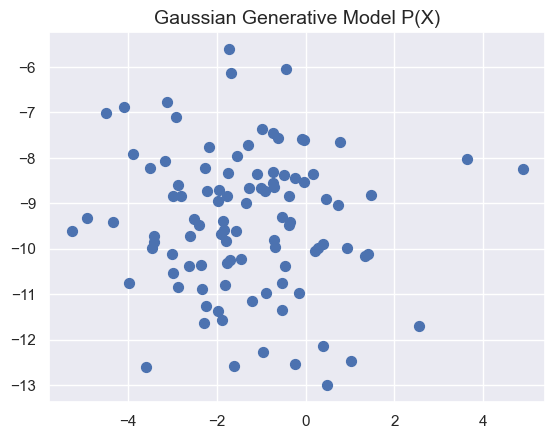

In [2]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=1, random_state=2, cluster_std=1.5)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=50)
ax.set_title('Gaussian Generative Model P(X)', size=14)

TODO - Fit the data X to a Gaussian using sklearn.mixture.GaussianMixture. Print the calculated mean and covariance.

In [3]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=2)
gmm.fit(X)

mu = gmm.means_[0]
cov = gmm.covariances_[0]

print("Calculated Mean:", mu)
print("Calculated Covariance Matrix:\n", cov)

Calculated Mean: [-1.34455235 -9.39684246]
Calculated Covariance Matrix:
 [[ 2.90753346 -0.1656239 ]
 [-0.1656239   2.36095868]]


C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TODO - Generate 10 new samples from the fitted model

In [4]:
X_sample, _ = gmm.sample(10)

print("Generated Samples:\n", X_sample)

Generated Samples:
 [[ -0.67773455  -9.67201494]
 [  2.86291894  -7.98120821]
 [  1.2795072  -11.45960898]
 [ -2.68673746 -10.9890142 ]
 [  0.03454167 -11.21805024]
 [ -1.31901828  -5.78305228]
 [ -1.87094919 -11.01573146]
 [ -2.48089117 -10.02111551]
 [ -0.8318838   -7.68395749]
 [ -0.10292115  -9.72946155]]


Make the contour plot of the Gaussian model based on calculated parameteres. Add generated samples to the plot.

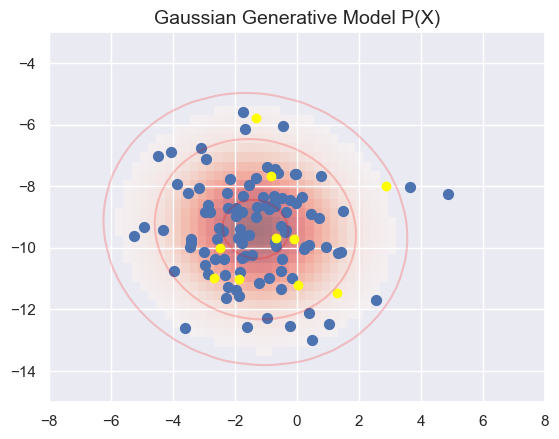

In [5]:
def gaussian(X, mu, cov):
    P = np.zeros((X.shape[0],), dtype=float)
    N = (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov))))
    for c, x in enumerate(X):
      x_m = (x - mu)
      P[c] = N * np.exp(-0.5 * (x_m.T @ np.linalg.inv(cov) @ x_m))
    return P

xlim = (-8, 8)
ylim = (-15, -3)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

P = gaussian(Xgrid, mu, cov)

Pm = np.ma.masked_array(P, P < 0.0018)

fig, ax = plt.subplots()
# Plot original data
ax.scatter(X[:, 0], X[:, 1], s=50)
ax.set_title('Gaussian Generative Model P(X)', size=14)
# Contour plot of the model
colour = 'red'
ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=colour.title() + 's')
ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.001, 0.01, 0.05, 0.09],
               colors= colour, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

# Adding generated data
ax.scatter(X_sample[:, 0], X_sample[:, 1], c='yellow')

Generate randomly 100 test points (uniformly, independently of Gaussian)

In [6]:
# Pseudo-random generator
rng = np.random.RandomState(0)

In [7]:
Xnew = rng.rand(1000, 2)

# Move and spread out the points
Xnew *= np.array([16,12])
Xnew += np.array([-8,-15])

TODO - Print the probabilities of test points belonging to the fitted model.




In [10]:
probs = gaussian(Xnew, mu, cov)

Plot test points

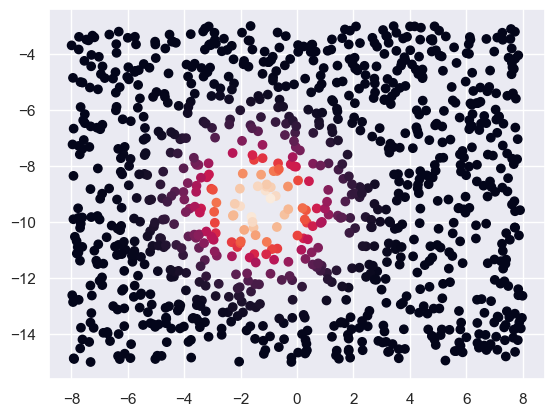

In [11]:
fig, ax = plt.subplots()
ax.scatter(Xnew[:, 0], Xnew[:, 1], c=probs)